# **DSL 24-1 기초 과제 1**

### 기수 : 12기
### 이름 : 김지은

In [1]:
# 코랩에서 작성할 경우 아래 주석을 해제해주세요
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


필수 라이버러리 갖고오기

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import timeit
from scipy import stats

## **2-3**

해당 문제에서는 예시 사진을 이용해서 SVD-Decomposition 이 어떻게 사진을 압축하는데에 사용이 되는지 보여주고 있습니다. 본인이 선정한 사진에 SVD-Decomposition 을 활용해서 Sigma 차원을 $100$ 으로 설정할 경우 용량이 실제로 줄어드는지 확인해보겠습니다.

경로 설정 (image.jpg 경로로 바꿔주세요!)

In [3]:
#path_to_image = "./data//image.jpg"
path_to_image = "/content/drive/MyDrive/image.jpg"

이미지 출력해서 확인해보기 (**편의상 흑백을 사용할 예정입니다**)

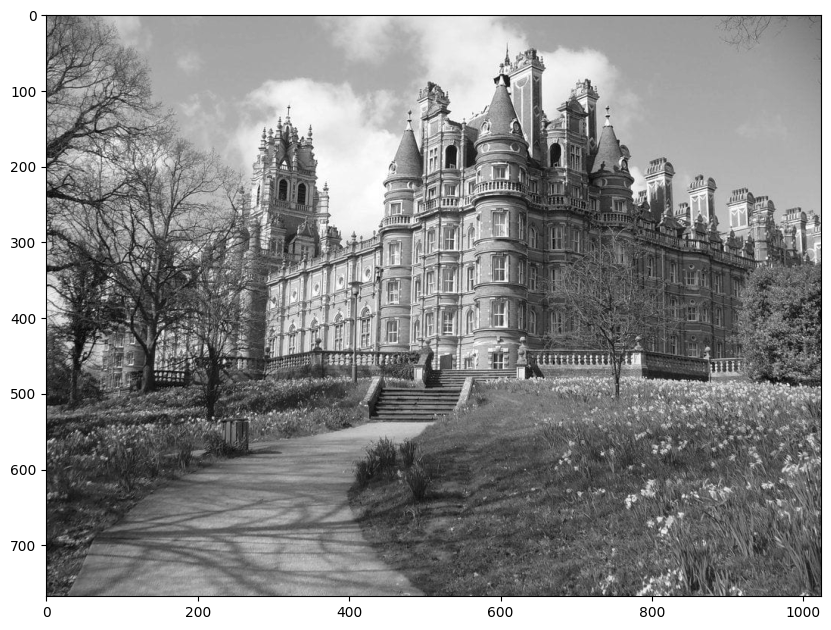

In [4]:
image = cv2.imread(path_to_image, cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(10, 13))
plt.imshow(image, cmap='gray')

다음과 같이 이미지를 Float32 형태의 데이터로 바꾸겠습니다.

In [5]:
image_float = image.astype(np.float32)
image_float.shape

(768, 1024)

그 뒤에 np.linalg.svd 를 활용해서 SVD-Decomposition 을 진행하겠습니다. 여기에서 np.linalg.svd 의 아웃풋은 $U$, 시그마 값, $V^\top$ 가 나오게 되며, 시그마 값을 이용해서 대각선에는 시그마 값들이 있으며 나머지는 $0$ 인 메트릭스를 만들겠습니다.

In [6]:
U, Sigma, Vt = np.linalg.svd(image_float)
print(Sigma.shape)
print(U.shape)
print(Vt.shape)

Sigma_mat = np.zeros((image_float.shape[0], image_float.shape[1]))
print(Sigma_mat)
np.fill_diagonal(Sigma_mat, Sigma)
# 시그마 행렬 확인 용도
print(Sigma_mat)
print(Sigma_mat.shape)

(768,)
(768, 768)
(1024, 1024)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[114412.84375         0.              0.         ...      0.
       0.              0.        ]
 [     0.          15117.45996094      0.         ...      0.
       0.              0.        ]
 [     0.              0.          13345.41796875 ...      0.
       0.              0.        ]
 ...
 [     0.              0.              0.         ...      0.
       0.              0.        ]
 [     0.              0.              0.         ...      0.
       0.              0.        ]
 [     0.              0.              0.         ...      0.
       0.              0.        ]]
(768, 1024)


 여기서부터는 해당 이미지에 관해서 고유벡터 $70$ 개만 쓰겠습니다. 즉(나머지 원소들은 $0$ )

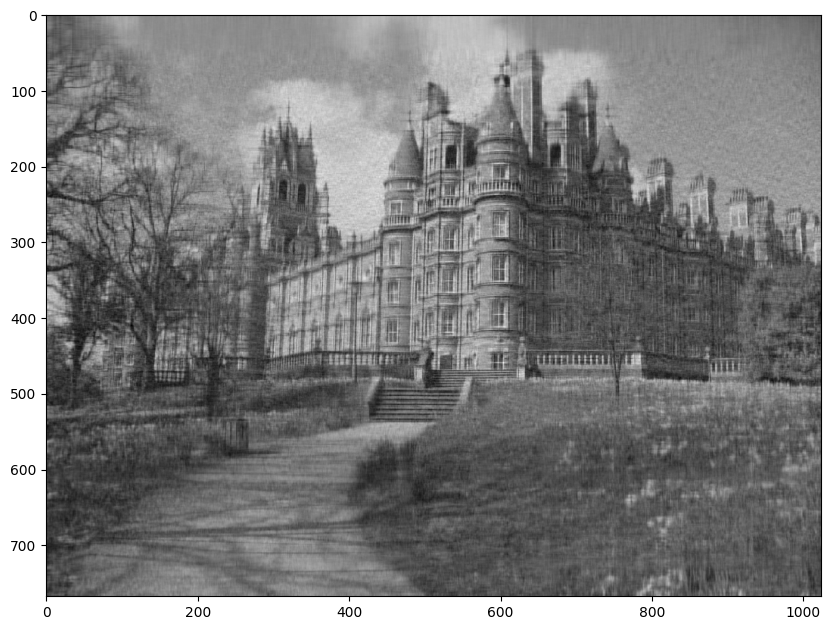

In [7]:
image_composition = np.matmul(U[:, :70], np.matmul(Sigma_mat[:70, :70], Vt[:70, :]))
fig = plt.figure(figsize=(10, 13))

plt.imshow(image_composition, cmap = 'gray')

전에 비해서 확실히 흐릿해진 모습을 보이고 있습니다. 그렇다면 해당 사진과 이전 사진과 비교해서 어떤 것이 더 많은 용량 (즉 더 많은 Non-Zero 값)을 사용하고 있는지 알아보겠습니다.

In [8]:
def count_nonzero_full_image():
    return np.count_nonzero(U) + np.count_nonzero(Sigma_mat) + np.count_nonzero(Vt)

def count_nonzero_compressed_image():
    return np.count_nonzero(U[:, :70]) + np.count_nonzero(Sigma_mat[:70, :70]) + np.count_nonzero(Vt[:70, :])

full_image_time = 0
compressed_image_time = 0

for i in range(10) :
  full_image_time += timeit.timeit(count_nonzero_full_image, number=100)
  compressed_image_time += timeit.timeit(count_nonzero_compressed_image, number=100)

print("Image Float uses ", np.count_nonzero(U) + np.count_nonzero(Sigma_mat) + np.count_nonzero(Vt), " Non-zero Elements")
print("Image Composition uses ", np.count_nonzero(U[:, :70]) + np.count_nonzero(Sigma_mat[:70, :70]) + np.count_nonzero(Vt[:70, :]), " Non-zero Elements")
print(f"Processing Time for 10 Full Images: {round(full_image_time, 5)} seconds")
print(f"Processing Time for 10 Compressed Images: {round(compressed_image_time, 5)} seconds")

Image Float uses  1639168  Non-zero Elements
Image Composition uses  125510  Non-zero Elements
Processing Time for 10 Full Images: 12.32598 seconds
Processing Time for 10 Compressed Images: 0.81782 seconds


원본과 확연히 큰 차이를 보이고 있습니다. 그럼에도 원래 이미지가 무엇을 표현하고 싶은지에 대한 정보를 여전히 포함하고 있습니다.
=> SVD-Decomposition 을 활용하면 더 적은 용량으로 원본의 정보를 살릴 수 있다!

## **문제 2-3**

아래에는 Skeleton Code 가 있습니다. 빈칸에 자기가 원하는 사진과 차원 수를 조정하면서 원본에 비해서 적은 용량을 차지하면서도 원본에 대한 정보를 유지해주세요.

In [9]:
path_to_image = "/content/drive/MyDrive/custom_image.jpg"

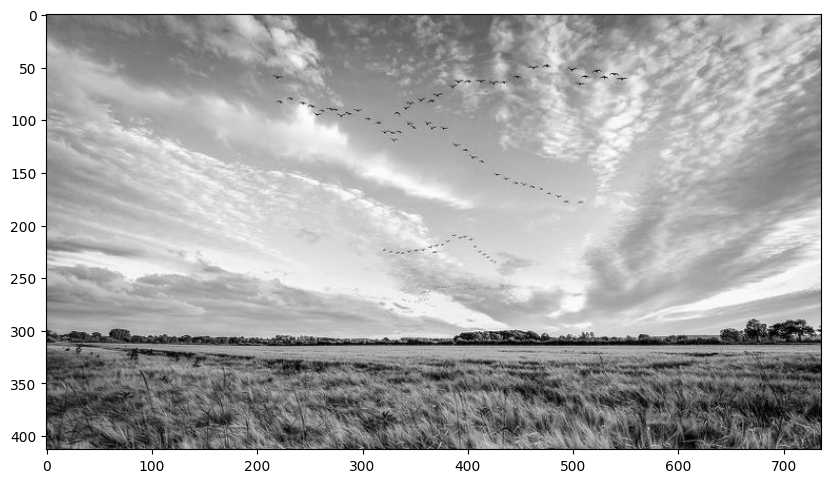

In [10]:
image = cv2.imread(path_to_image, cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(10, 13))
plt.imshow(image, cmap='gray')

In [11]:
image_float = image.astype(np.float32)
U, Sigma, Vt = np.linalg.svd(image_float)
Sigma_mat = np.zeros((image_float.shape[0], image_float.shape[1]))
np.fill_diagonal(Sigma_mat, Sigma)
print("Image Float's Shape : ", image_float.shape)

Image Float's Shape :  (413, 736)


시그마 메트릭스 $(\Sigma)$ 차원 설정

In [12]:
num_elements = 60

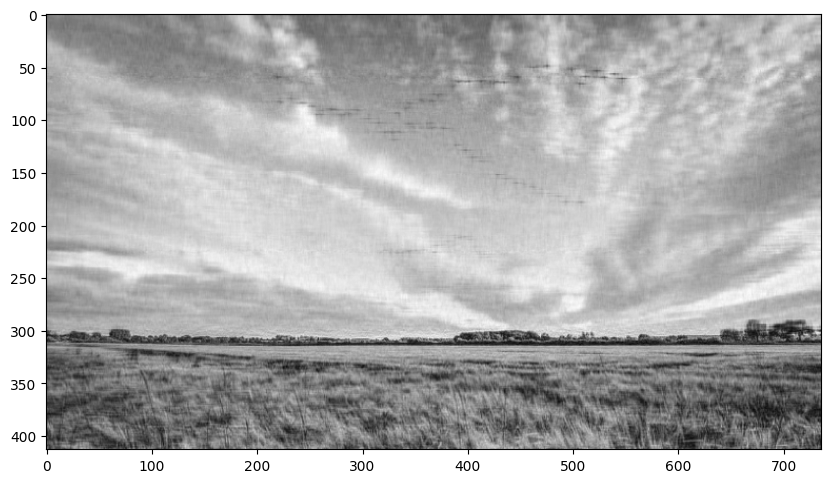

In [13]:
image_composition = np.matmul(U[:, :num_elements], np.matmul(Sigma_mat[:num_elements, :num_elements], Vt[:num_elements, :]))
fig = plt.figure(figsize=(10, 13))

plt.imshow(image_composition, cmap = 'gray')

In [14]:
full_image_time = 0
compressed_image_time = 0

for i in range(10) :
  full_image_time += timeit.timeit(count_nonzero_full_image, number=100)
  compressed_image_time += timeit.timeit(count_nonzero_compressed_image, number=100)

print("Image Float uses ", np.count_nonzero(U) + np.count_nonzero(Sigma_mat) + np.count_nonzero(Vt), " Non-zero Elements")
print("Image Composition uses ", np.count_nonzero(U[:, :70]) + np.count_nonzero(Sigma_mat[:70, :70]) + np.count_nonzero(Vt[:70, :]), " Non-zero Elements")
print(f"Processing Time for 10 Full Images: {round(full_image_time, 5)} seconds")
print(f"Processing Time for 10 Compressed Images: {round(compressed_image_time, 5)} seconds")

Image Float uses  712678  Non-zero Elements
Image Composition uses  80500  Non-zero Elements
Processing Time for 10 Full Images: 2.22659 seconds
Processing Time for 10 Compressed Images: 0.19166 seconds


## **문제 4-2**

파이썬의 scipy.stats 을 활용해서 유의수준 5%에서의 가설검정을 수행하고 결론을 도출하시오.

heights.csv 경로 설정하기

In [15]:
#path_to_csv = "./data/heights.csv"
path_to_csv = "/content/drive/MyDrive/heights.csv"

전처리

In [29]:
data = pd.read_csv(path_to_csv)
DSL = data[data['which'] == 'DSL']
ESC = data[data['which'] == 'ESC']
Else = data[data['which'] == 'Else']


0     181.8
1     161.3
2     177.8
3     169.1
4     181.2
      ...  
73    173.4
74    182.2
75    181.5
76    178.7
77    173.1
Name: heights, Length: 78, dtype: float64

DSL 데이터 형태

In [25]:
DSL.head()

heights which
0    181.8   DSL
1    161.3   DSL
2    177.8   DSL
3    169.1   DSL
4    181.2   DSL

ESC 데이터 형태

In [26]:
ESC.head()

heights which
78    171.1   ESC
79    159.2   ESC
80    184.9   ESC
81    176.1   ESC
82    184.8   ESC

Else 데이터 형태

In [27]:
  Else.head()

heights which
141    180.6  Else
142    169.3  Else
143    176.0  Else
144    180.3  Else
145    177.7  Else

In [30]:
import scipy.stats as stats
f, pVal = stats.f_oneway(DSL["heights"], ESC["heights"], Else["heights"])

alpha = 0.05
if pVal < alpha:
    conclusion = "귀무가설을 기각한다. 각 학회의 평균 키가 모두 같지는 않다."
else:
    conclusion = "귀무가설을 기각하지 않는다. 각 학회의 평균 키는 모두 동일하다."

print(f"F통계량 : {f}")
print(f"p value : {pVal}")
print(conclusion)


F통계량 : 6.82185346949053
p value : 0.0013059664602332191
귀무가설을 기각한다. 각 학회의 평균 키가 모두 같지는 않다.


## **문제 6**

파이썬의 pandas와 numpy 활용과 관련한 몇몇 예제입니다. 주어진 실행 결과와 요구하는 바에 맞게 코드를 작성하시오.

#### 6-A. Pandas

In [31]:
import pandas as pd

#path_to_csv = "./data/train.csv"
path_to_csv = "/content/drive/MyDrive/train.csv"
data = pd.read_csv(path_to_csv)

In [32]:
data.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

6-1. 사용자의 Name은 여러 ,로 나누어져 있습니다. 첫번째 , 이전의 텍스트를 새로운 filteredName이라는 새로운 변수로 dataframe에 추가해주세요.

In [33]:
# TO-DO

# 1. Name 변수에 대한 전처리
# 2. 전처리 한 변수를 다시 dataframe에 추가

filteredName=[]
name_split=list(data["Name"].str.split(","))

for i in range(len(name_split)):
  filteredName.append(name_split[i][0])
data["filteredName"]=filteredName
data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked filteredName  
0        0         A/5 21171   7.2500   NaN        S       Braund  
1        0          PC 17599  71.2833   C85        C      Cumings  
2        0  STON/O2. 3101282   7.9250   NaN        S    Heikkinen  
3        0            113803  53.1000  C123        S     Futrelle  
4        0            373450   8.0500   NaN        S        Allen  
..     ...               ...      ...   ...      ...          ...  
886      0            211536  13.0000   NaN        S     Montvila  
887      0            112053  30.0000   B42        S       Graham  
888      2        W./C. 6607  23.4500   NaN        S     Johnston  
889      0            111369  30.0000  C148        C         Behr  
890      0            370376   7.7500   NaN        Q       Dooley  

[891 rows x 13 columns]

6-2. 사용자를 PassengerId가 아닌 Age를 기준으로 정렬하여주세요.

In [34]:
# TO-DO

# 정렬

data_sorted=data.sort_values(by="Age")
data_sorted

PassengerId  Survived  Pclass                                      Name  \
803          804         1       3           Thomas, Master. Assad Alexander   
755          756         1       2                 Hamalainen, Master. Viljo   
644          645         1       3                    Baclini, Miss. Eugenie   
469          470         1       3             Baclini, Miss. Helene Barbara   
78            79         1       2             Caldwell, Master. Alden Gates   
..           ...       ...     ...                                       ...   
859          860         0       3                          Razi, Mr. Raihed   
863          864         0       3         Sage, Miss. Dorothy Edith "Dolly"   
868          869         0       3               van Melkebeke, Mr. Philemon   
878          879         0       3                        Laleff, Mr. Kristo   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   

        Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked  \
803    male  0.42      0      1        2625   8.5167   NaN        C   
755    male  0.67      1      1      250649  14.5000   NaN        S   
644  female  0.75      2      1        2666  19.2583   NaN        C   
469  female  0.75      2      1        2666  19.2583   NaN        C   
78     male  0.83      0      2      248738  29.0000   NaN        S   
..      ...   ...    ...    ...         ...      ...   ...      ...   
859    male   NaN      0      0        2629   7.2292   NaN        C   
863  female   NaN      8      2    CA. 2343  69.5500   NaN        S   
868    male   NaN      0      0      345777   9.5000   NaN        S   
878    male   NaN      0      0      349217   7.8958   NaN        S   
888  female   NaN      1      2  W./C. 6607  23.4500   NaN        S   

      filteredName  
803         Thomas  
755     Hamalainen  
644        Baclini  
469        Baclini  
78        Caldwell  
..             ...  
859           Razi  
863           Sage  
868  van Melkebeke  
878         Laleff  
888       Johnston  

[891 rows x 13 columns]

6-3. 위의 head로 살폈을 때, Cabin 변수에는 결측치 (NaN) 값이 많은 것으로 보여집니다. Cabin 변수의 데이터 종류 (NaN-?개, C95-?개 등)을 확인하여 히스토그램으로 시각화해주세요.

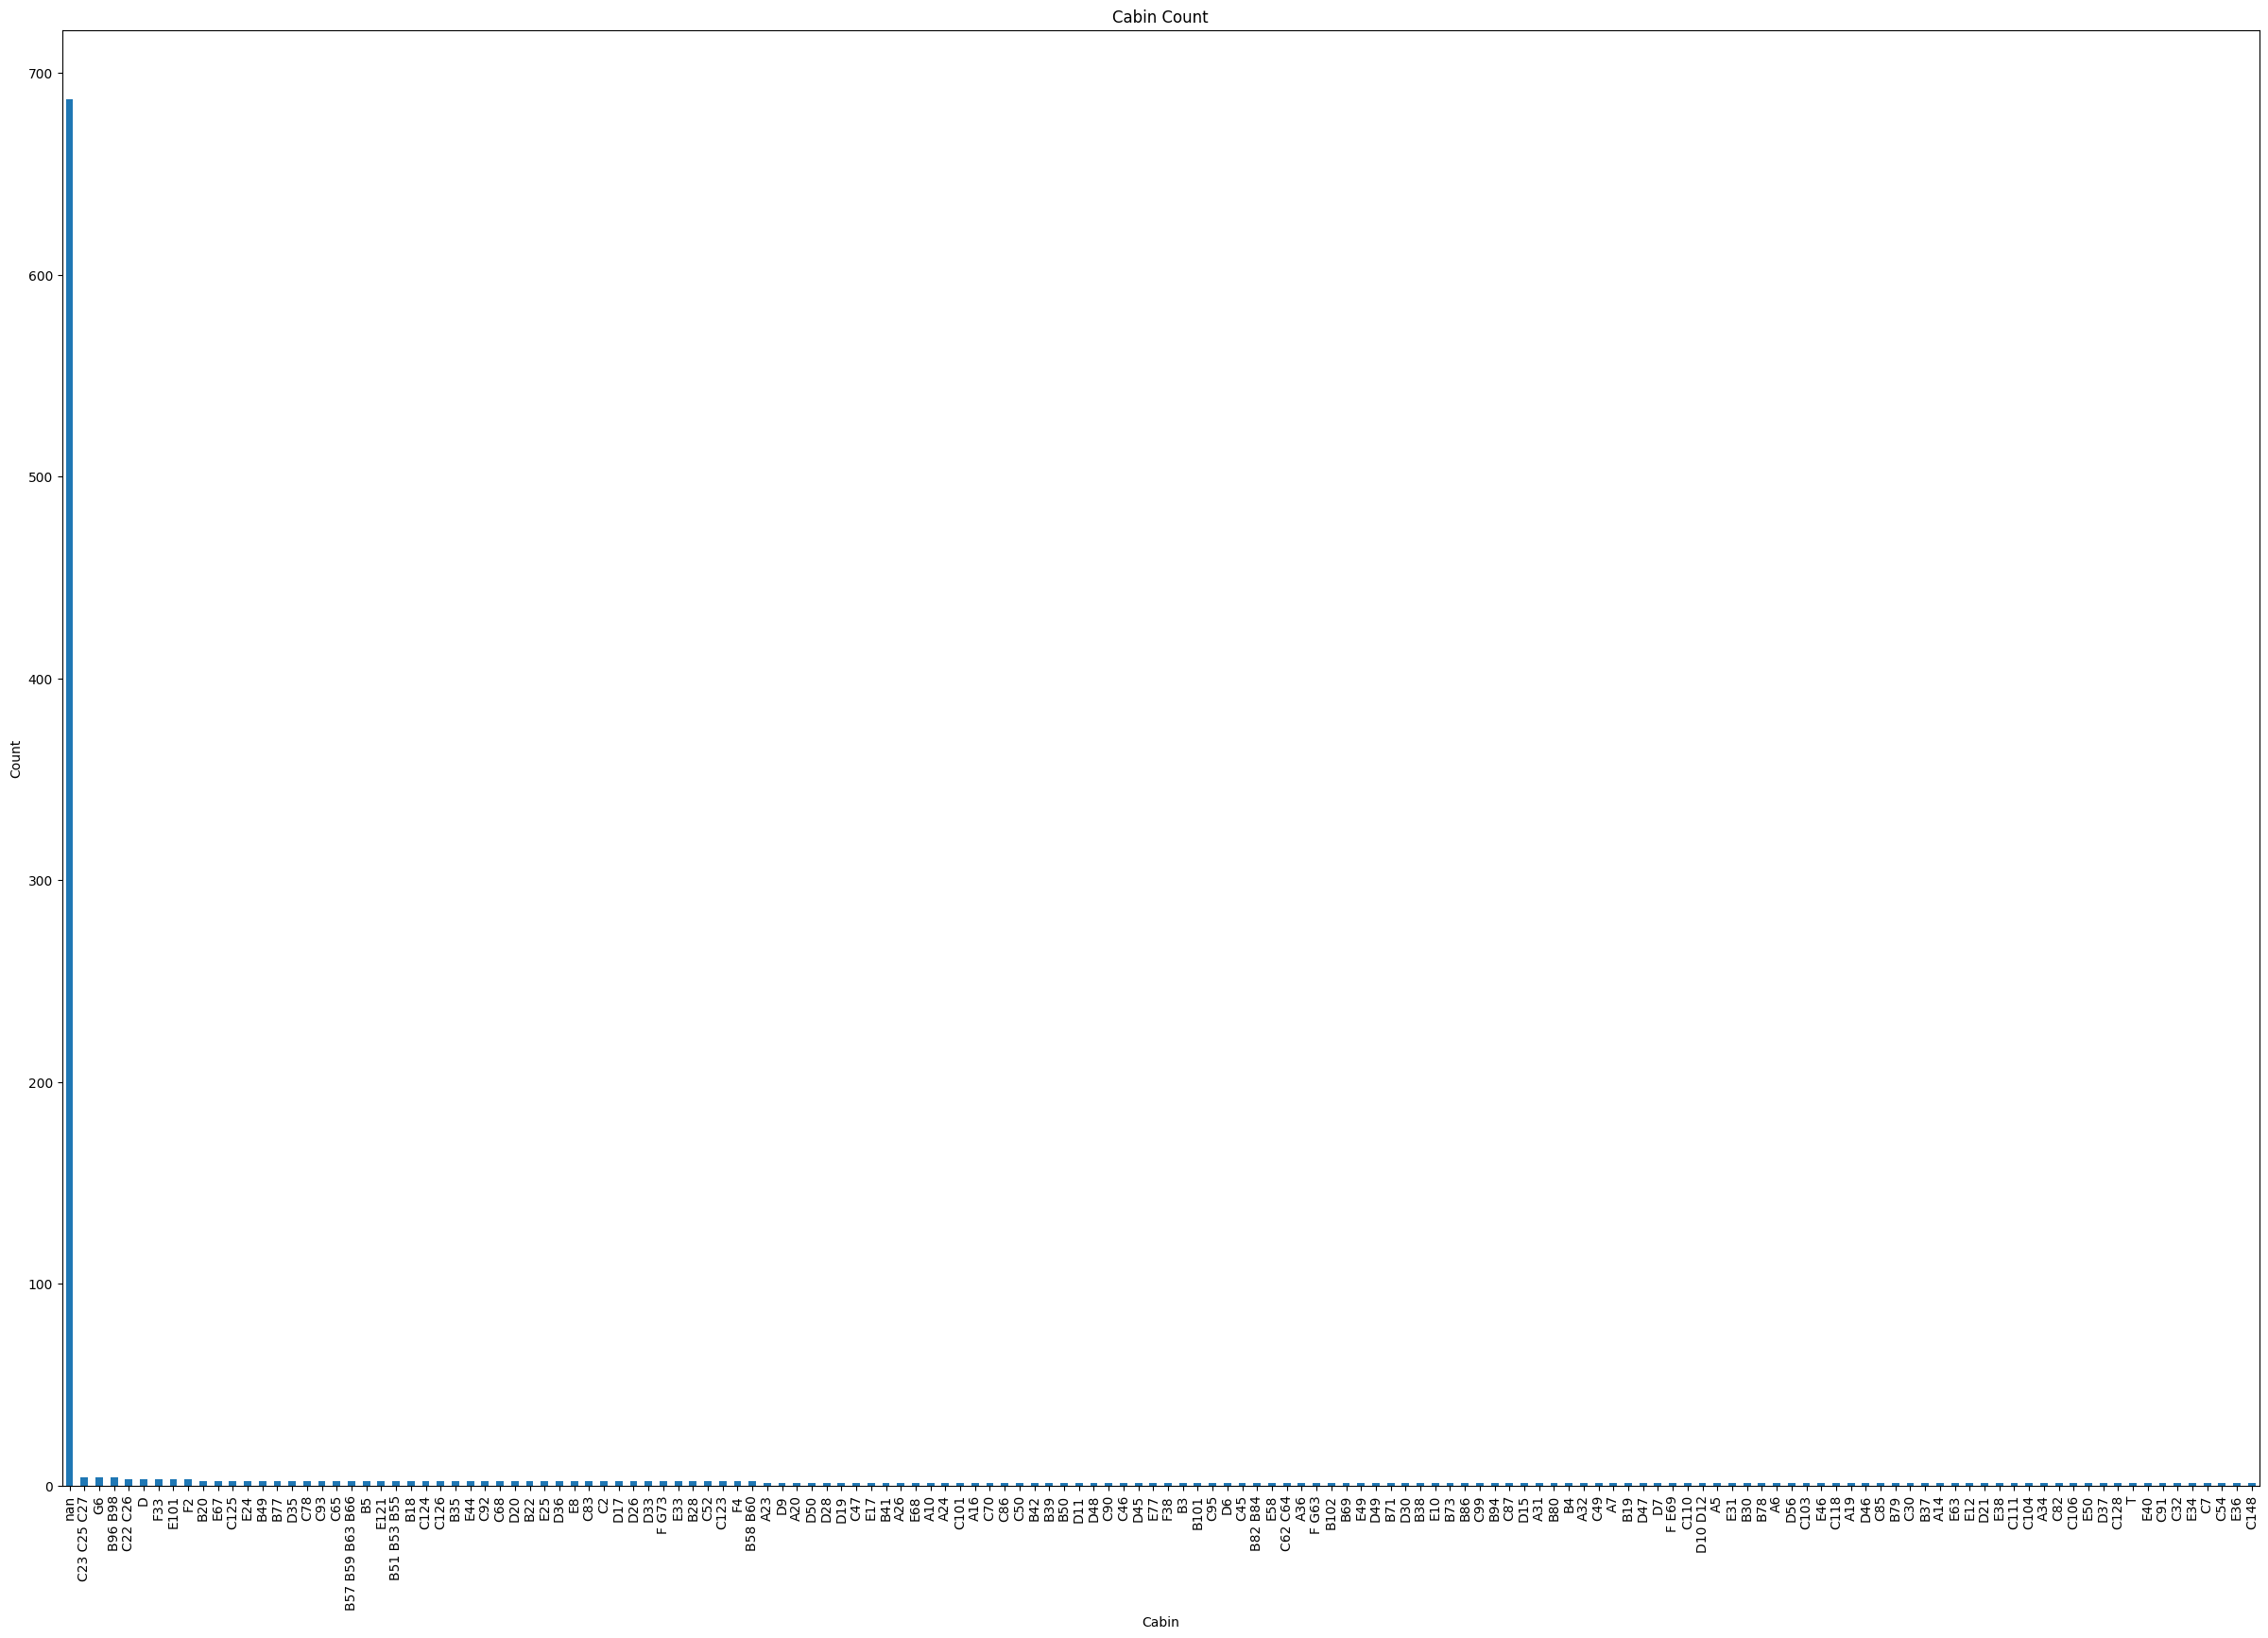

In [35]:
# TO-DO

# 1. Cabin 변수의 값 종류 확인
# 2. 히스토그램 시각화
import pandas as pd
import matplotlib.pyplot as plt

Cabin_count=data["Cabin"].value_counts(dropna=False)
Cabin_count

plt.figure(figsize=(30, 20))
Cabin_count.plot(kind='bar')

plt.title('Cabin Count')
plt.xlabel('Cabin')
plt.ylabel('Count')
plt.show()

6-4. (Optional)

Sibsp는 # of siblings / spouses aboard the Titanic, Parch는 # of parents / children abroad the Titanic 입니다. Sibsp 변수와 Parch 중 Survived 변수 중 Survived 여부에 영향을 끼치는 하나의 변수를 선택한다면 무엇을 선택할 것이며, 그 이유가 무엇인가요?

#### 6-B. Numpy

6-5. 아래 lst와 같이 주어진 행렬이 있습니다. 해당 3x3 행렬을 4x2x2 tensor로 변환해주세요. 각각의 2x2 행렬은 좌측 상단 / 좌측 하단 / 우측 상단 / 우측 하단을 뜻합니다.

In [36]:
import numpy as np

lst = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

arr = np.array(lst)
# TO-DO
tensor = np.zeros((4, 2, 2), dtype=int)

# 좌측 상단
tensor[0] = arr[:2, :2]

# 좌측 하단
tensor[1] = arr[1:, :2]

# 우측 상단
tensor[2] = arr[:2, 1:]

# 우측 하단
tensor[3] = arr[1:, 1:]

print(tensor)

[[[1 2]
  [4 5]]

 [[4 5]
  [7 8]]

 [[2 3]
  [5 6]]

 [[5 6]
  [8 9]]]


6-6. Unifrom Distribution으로부터 Sampling한 100개의 점과 Gaussian Distribution으로부터 Sampling한 100개의 점의 분포를 시각화해주세요. 시각화 시 plot에 각 분포의 평균/중앙값을 점선으로 함께 시각화해주세요.

1. uniform distribution은 (0, 1) 범위로, gaussian은 mean이 0, std가 1입니다.
2. 해당 문제에서 사용할 수 있는 라이브러리는 Numpy와 Matplotlib로 제한합니다.

![image.png](attachment:image.png)

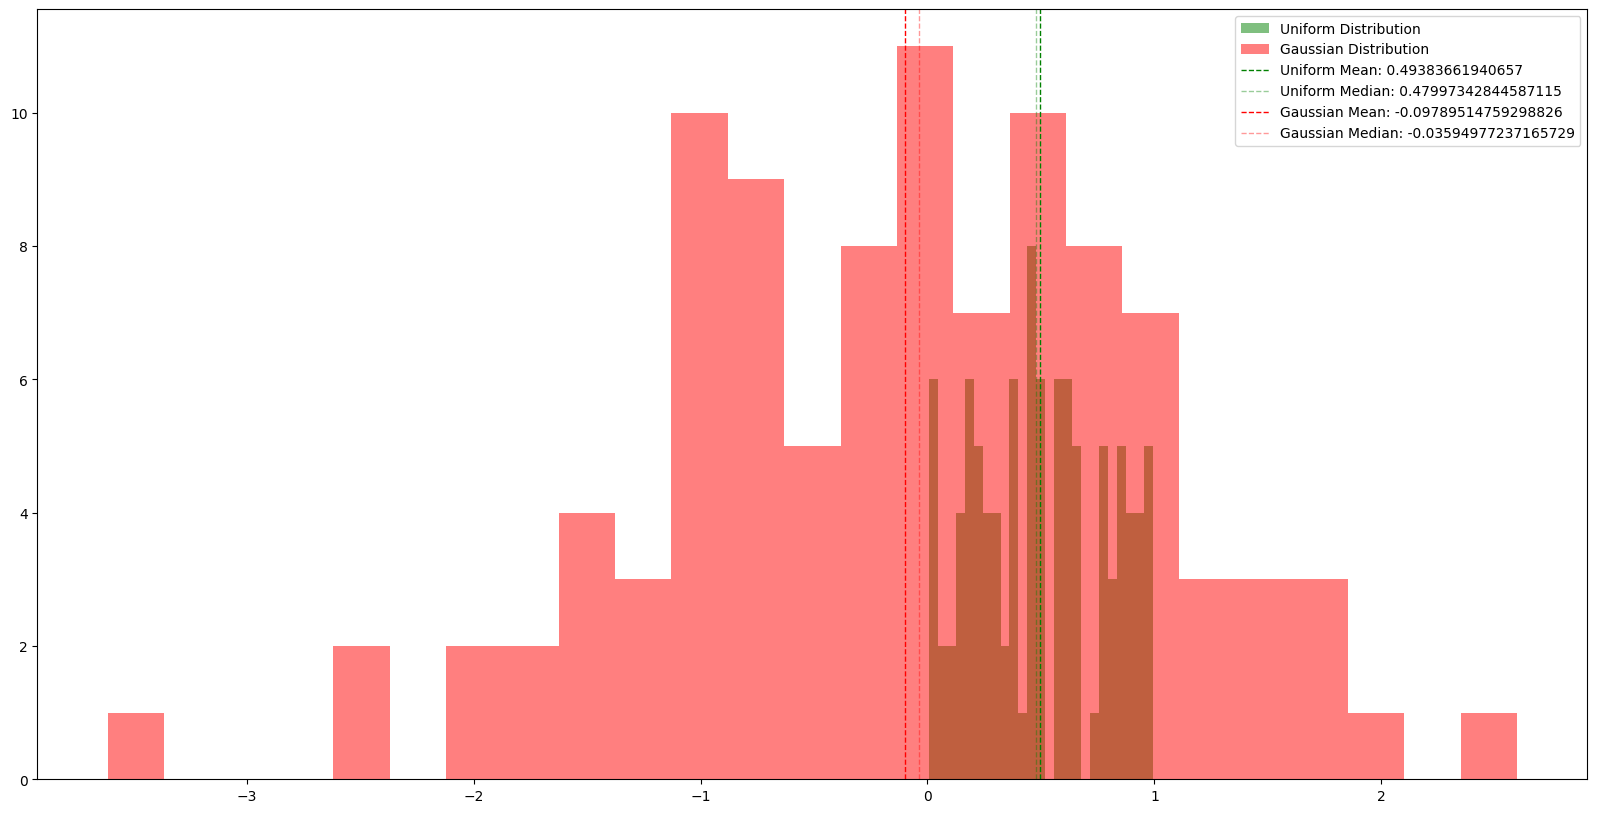

In [37]:
# TO-DO

# 1. Uniform Distribution으로부터 100개의 점 Sampling
# 2. Gaussian Distribution으로부터 100개의 점 Sampling
# 3. 시각화
# 4. 평균/중앙값 점선으로 시각화

import numpy as np
import matplotlib.pyplot as plt

uniform = np.random.uniform(0, 1, 100)
gaussian = np.random.normal(0, 1, 100)

plt.figure(figsize=(20, 10))

# Uniform Distribution의 히스토그램
plt.hist(uniform, bins=25, alpha=0.5, color='green', label='Uniform Distribution')

# Gaussian Distribution의 히스토그램
plt.hist(gaussian, bins=25, alpha=0.5, color='red', label='Gaussian Distribution')

uniform_mean = np.mean(uniform )
uniform_median = np.median(uniform)
gaussian_mean = np.mean(gaussian )
gaussian_median = np.median(gaussian)

plt.axvline(uniform_mean, color='green', linestyle='dashed', linewidth=1, label=f'Uniform Mean: {uniform_mean}')
plt.axvline(uniform_median, color='green', linestyle='dashed', linewidth=1, label=f'Uniform Median: {uniform_median}', alpha=0.4)
plt.axvline(gaussian_mean, color='red', linestyle='dashed', linewidth=1, label=f'Gaussian Mean: {gaussian_mean}')
plt.axvline(gaussian_median, color='red', linestyle='dashed', linewidth=1, label=f'Gaussian Median: {gaussian_median}', alpha=0.4)

plt.legend()
plt.show()